<a href="https://colab.research.google.com/github/pavankumarallu/Pytorch-Practice/blob/main/3_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backpropagation
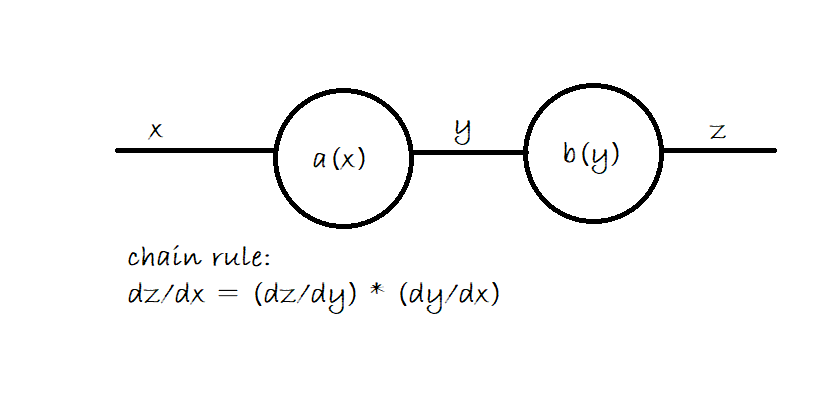

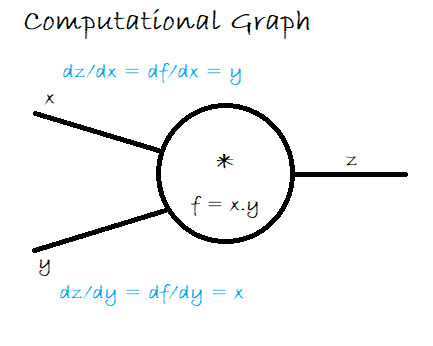

* Forward pass : Compute Loss
* Compute local Gradients
* Backward pass : Compute dLoss/dWeights using the chain rule

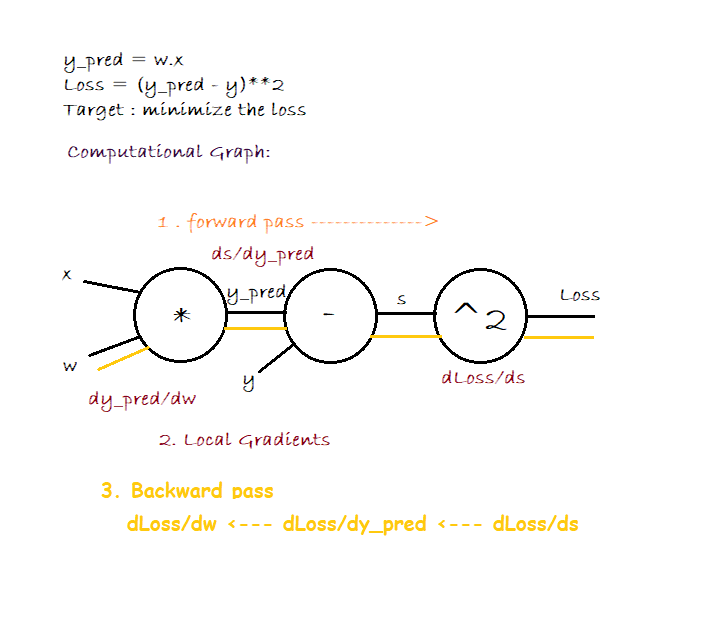


## Implementation of linear regression manually

In [8]:
import numpy as np

# f = w*x
# f = 2*x

#initialize x and y

X = np.array([1,2,3,4], dtype = np.float32)
Y = np.array([300,600,900,1200], dtype = np.float32)

w = 0.0

def forward(x):
  return w*x

#loss
def loss(y,y_predicted):
  return ((y_predicted - y)**2).mean()

#gradient
# MSE = 1/N * (w*x - y)**2
# dj/dw = 1/N 2x (w*x -y)


def gradient(x,y,y_predicted):
  return np.dot(2*x,y_predicted-y).mean()


print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


In [9]:
#training

learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
  y_pred = forward(X)
  l = loss(Y,y_pred)
  dw = gradient(X,Y,y_pred)
  #update weights
  w = w - learning_rate*dw

  if epoch % 1 == 0:
    print(f'epoch {epoch + 1}: w = {w:.3f}, Loss = {l:.8f}')

print(f'Prediction After training: f(5) = {forward(5):.3f}')


epoch 1: w = 180.000, Loss = 675000.00000000
epoch 2: w = 252.000, Loss = 108000.00000000
epoch 3: w = 280.800, Loss = 17280.00000000
epoch 4: w = 292.320, Loss = 2764.80371094
epoch 5: w = 296.928, Loss = 442.36715698
epoch 6: w = 298.771, Loss = 70.77832031
epoch 7: w = 299.508, Loss = 11.32449818
epoch 8: w = 299.803, Loss = 1.81191063
epoch 9: w = 299.921, Loss = 0.28995070
epoch 10: w = 299.969, Loss = 0.04638995
Prediction After training: f(5) = 1499.843


## Implementing using Pytorch autograd 

In [18]:
import torch

# Here we replace the manually computed gradient with autograd

# Linear regression
# f = w * x 

# here : f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')



Prediction before training: f(5) = 0.000


In [19]:
# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # zero the gradients after updating
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000
